### Ryan Grant

## Research question/interests

As someone in the final years of my Undergraduate degree, I will be soon entering the workforce and very curious about employee attrition. There are some very interesting data in this dataset including how education relates to job involvement, enviroment satisfaction, and work life balance. I would find it very interesting to see how job involvement correlates to work-life balance.

## Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

dataset = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
dataset.columns



Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [2]:
dataset.shape

(1470, 35)

In [3]:
dataset.nunique(axis=0)
dataset.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.000000,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.000000,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.000000,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.000000,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='DistanceFromHome', ylabel='YearsAtCompany'>

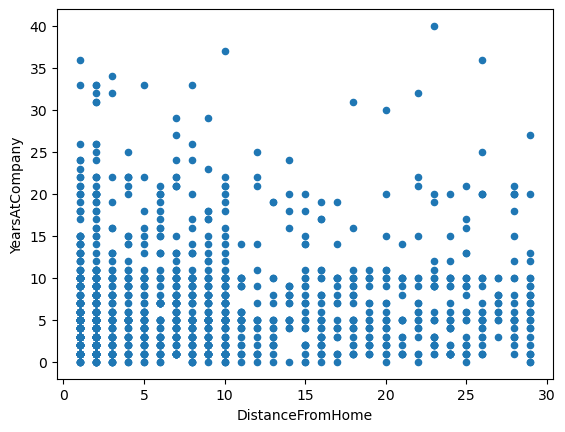

In [4]:
#This dataset contains no null values, and no initially apparent outlier or duplicate date
dataset.plot(kind='scatter', x='DistanceFromHome', y='YearsAtCompany')
#in this relation of Distance to home to years at company I would expect to see that a lower distance from home would correlate to more years at the company. While that seems to be somewhat true, the data is far more distributed that I would expect.

<AxesSubplot:xlabel='count', ylabel='GroupedAge'>

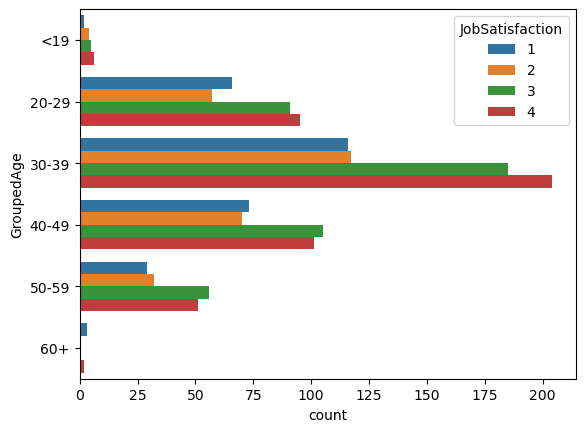

In [5]:
dataset["GroupedAge"]= np.nan
conditionsAge = [
    (dataset['Age'] <= 19),
    (dataset['Age'] > 19) & (dataset['Age'] <= 29),
    (dataset['Age'] > 29) & (dataset['Age'] <= 39),
    (dataset['Age'] > 39) & (dataset['Age'] <= 49),
    (dataset['Age'] > 49) & (dataset['Age'] <= 59),
    (dataset['Age'] > 59)
    ]
valuesAge=["<19","20-29","30-39","40-49","50-59","60+"]
dataset["GroupedAge"]= np.select(conditionsAge,valuesAge)
sns.countplot(data=dataset, y='GroupedAge', hue='JobSatisfaction',order=valuesAge)

<AxesSubplot:>

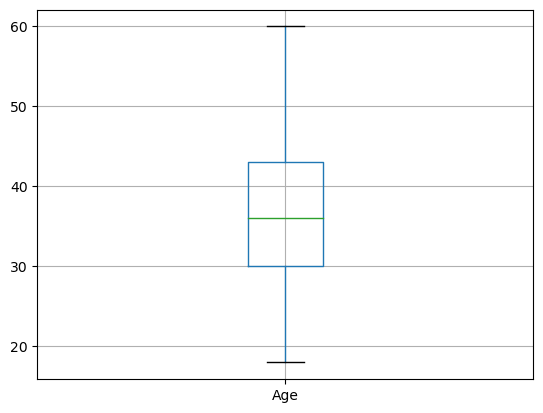

In [6]:
dataset.boxplot('Age')
#As a quick visiualization for what spread in age was for this dataset I used a boxplot. As seen with the tails the min is 18 and the max is 60. And most of the data falls in the range of 30 to 43.

<AxesSubplot:ylabel='Frequency'>

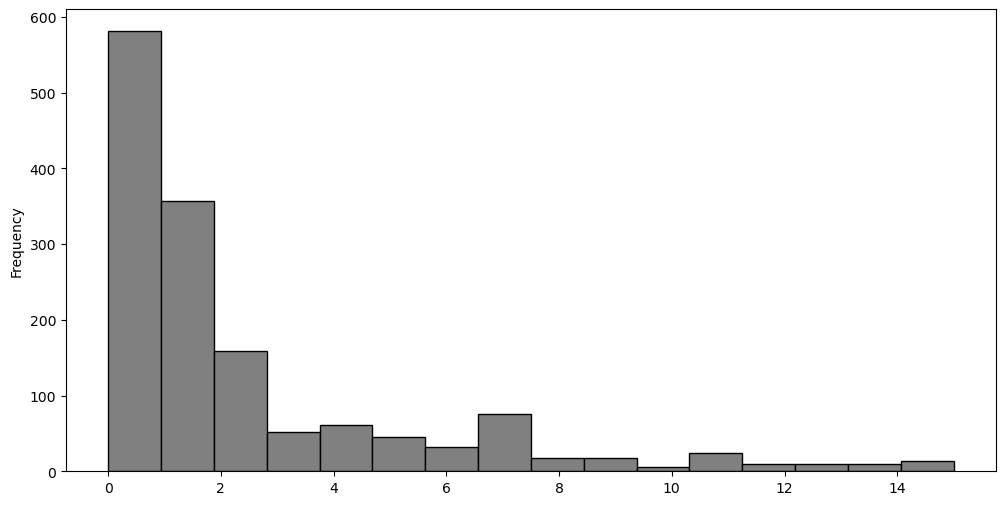

In [7]:
dataset['YearsSinceLastPromotion'].plot(kind='hist', bins=16, figsize=(12,6), facecolor='grey',edgecolor='black')
# in this data visiualisation I was curious what the frequency of people going many years without a promotion were. It supprised me to see that the vast majority of people had a promotion with the last 0-2 years

<AxesSubplot:xlabel='count', ylabel='JobInvolvement'>

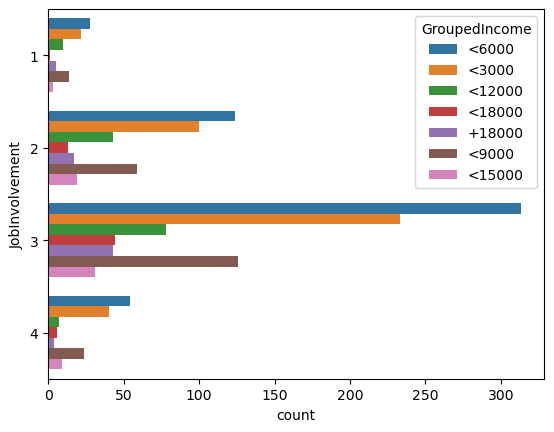

In [8]:

dataset["GroupedIncome"]= np.nan
conditions = [
    (dataset["MonthlyIncome"] <= 3000),
    (dataset["MonthlyIncome"] > 3000) & (dataset["MonthlyIncome"] <= 6000),
    (dataset["MonthlyIncome"] > 6000) & (dataset["MonthlyIncome"] <= 9000),
    (dataset["MonthlyIncome"] > 9000) & (dataset["MonthlyIncome"] <= 12000),
    (dataset["MonthlyIncome"] > 12000) & (dataset["MonthlyIncome"] <= 15000),
    (dataset["MonthlyIncome"] > 15000) & (dataset["MonthlyIncome"] <= 18000),
    (dataset["MonthlyIncome"] > 18000)
    ]
values=["<3000","<6000","<9000","<12000","<15000","<18000","+18000"]
dataset["GroupedIncome"]= np.select(conditions,values)
sns.countplot(data=dataset, y='JobInvolvement', hue='GroupedIncome')
#sns.countplot(data=dataset,x="GroupedIncome",order=values)
#dataset.plot(kind='scatter', x='TotalWorkingYears', y='GroupedIncome')
#in This relation I was checking the correlation between Monthly Income and Total working years. As I would suspect there is a strong trend between more years worked and monthly income.

## Task 2

In [9]:


#Step 1 load data
dataset = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
#Step 2 process data 

#remove rows with null values, total rows remains the same therefore there were no null values to begin with
if dataset.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(dataset[dataset.isnull().any(axis=1)].head(3))
    missingno.matrix(dataset)
    plt.show()
else:
    print("No null values in dataset")
#remove columns that are not being used
dataset.drop(columns=["EmployeeCount",'EmployeeNumber','StandardHours','Over18'])
#step 3 process data
#set columns as a categorical type
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['OverTime'] = dataset['OverTime'].astype('category')
dataset['MaritalStatus'] = dataset['MaritalStatus'].astype('category')
dataset['Attrition'] = dataset['Attrition'].astype('category')
dataset['BusinessTravel'] = dataset['BusinessTravel'].astype('category')
dataset['Department'] = dataset['Department'].astype('category')
dataset['EducationField'] = dataset['EducationField'].astype('category')
dataset['Education'] = dataset["Education"].astype("category")
dataset['EnvironmentSatisfaction'] = dataset["EnvironmentSatisfaction"].astype("category")
dataset['JobInvolvement'] = dataset["JobInvolvement"].astype("category")
dataset['JobLevel'] = dataset["JobLevel"].astype("category")
dataset['JobRole'] = dataset["JobRole"].astype("category")
dataset['JobSatisfaction'] = dataset["JobSatisfaction"].astype("category")
dataset['RelationshipSatisfaction'] = dataset["RelationshipSatisfaction"].astype("category")
dataset['StockOptionLevel'] = dataset["StockOptionLevel"].astype("category")
dataset['WorkLifeBalance'] = dataset["WorkLifeBalance"].astype("category")
dataset['PerformanceRating'] = dataset["PerformanceRating"].astype("category")

#Then remove duplicate entries
if len(dataset[dataset.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dataset[dataset.duplicated()]))
    print(dataset[dataset.duplicated(keep=False)].sort_values(by=list(dataset.columns)).head())
else:
    print("No duplicated entries found")
#Step 4 Wrangle data

No null values in dataset
No duplicated entries found


## Task 3

In [10]:
def load_and_process(dataset):
    if dataset.isnull().any(axis=None):
        print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
        print(dataset[dataset.isnull().any(axis=1)].head(3))
        missingno.matrix(dataset)
        plt.show()
    else:
        print("No null values in dataset")
    dataset.drop(columns=["EmployeeCount",'EmployeeNumber','StandardHours','Over18'])
    dataset['Gender'] = dataset['Gender'].astype('category')
    dataset['OverTime'] = dataset['OverTime'].astype('category')
    dataset['MaritalStatus'] = dataset['MaritalStatus'].astype('category')
    dataset['Attrition'] = dataset['Attrition'].astype('category')
    dataset['BusinessTravel'] = dataset['BusinessTravel'].astype('category')
    dataset['Department'] = dataset['Department'].astype('category')
    dataset['EducationField'] = dataset['EducationField'].astype('category')
    dataset['Education'] = dataset["Education"].astype("category")
    dataset['EnvironmentSatisfaction'] = dataset["EnvironmentSatisfaction"].astype("category")
    dataset['JobInvolvement'] = dataset["JobInvolvement"].astype("category")
    dataset['JobLevel'] = dataset["JobLevel"].astype("category")
    dataset['JobRole'] = dataset["JobRole"].astype("category")
    dataset['JobSatisfaction'] = dataset["JobSatisfaction"].astype("category")
    dataset['RelationshipSatisfaction'] = dataset["RelationshipSatisfaction"].astype("category")
    dataset['StockOptionLevel'] = dataset["StockOptionLevel"].astype("category")
    dataset['WorkLifeBalance'] = dataset["WorkLifeBalance"].astype("category")
    dataset['PerformanceRating'] = dataset["PerformanceRating"].astype("category")
    if len(dataset[dataset.duplicated()]) > 0:
        print("No. of duplicated entries: ", len(dataset[dataset.duplicated()]))
        print(dataset[dataset.duplicated(keep=False)].sort_values(by=list(dataset.columns)).head())
    else:
        print("No duplicated entries found")
    return dataset